# Session 1: Markov Decision Processes and Monte Carlo

## What and Why of Reinforcement Learning

Level of workflow automation in classes of machine learning algorithm
* Supervised Learning
$$\text{Raw Data (X,y)} \Rightarrow \text{Labeled Data} \rightarrow \text{Model} \rightarrow \text{Predicted Labels} \Rightarrow \text{Actions}$$

* Unsupervised Learning
$$\text{Raw Data (X)} \rightarrow \text{Model} \rightarrow \text{Predicted Clusters} \Rightarrow \text{Labled Clusters} \Rightarrow \text{Actions}$$

* Reinforcement Learning
$$\text{Raw Data} \Rightarrow \text{RL Scheme (S,A,R,S',A')} \rightarrow \text{Model} \rightarrow \text{Action}$$


where $\Rightarrow$ denotes transformations that require humans and $\rightarrow$ denotes those that do not.

![RL Framework](img/rl_framework.png)
Source: [Sutton and Barto](https://cdn.preterhuman.net/texts/science_and_technology/artificial_intelligence/Reinforcement%20Learning%20%20An%20Introduction%20-%20Richard%20S.%20Sutton%20,%20Andrew%20G.%20Barto.pdf)

A few reasons [Deep Reinforcement Learning Doesn't Work Yet](https://www.alexirpan.com/2018/02/14/rl-hard.html):
* It still takes too much time to learn simple things; for instance, one of the previous state-of-the-art Rainbow model takes over 80 hours to learn to play Atari games at human level. Even a child would only need a few hours on their phone.
* Supervised learning works so well.
* Instead of labels, you decide on a reward to motivate the models and it is a tricky business; for example, how would give rewards to an humanoid robot agent for it to learn how to walk?
* There are so many hyperparameters to take care of.
* A lot of times it is [just random search](https://arxiv.org/abs/1803.07055).

But it has been successful (better than supervised learning) in:
* Beating professional [Go players](https://deepmind.com/research/alphago/), [SuperSmash Bro](https://www.youtube.com/watch?v=dXJUlqBsZtE) and, to some extent [DotA players](https://blog.openai.com/openai-five/).
* Reduce data center power usage and [save 40% of electricity bill](https://deepmind.com/blog/deepmind-ai-reduces-google-data-centre-cooling-bill-40/)
* Neural architecture search for better algorithms aka [AutoML](https://cloud.google.com/automl/)
* Control tasks for robotics
* Simple ads bidding for online marketing

And most likely being tried for:
* [Algorithmic trading](http://www.wildml.com/2018/02/introduction-to-learning-to-trade-with-reinforcement-learning/)
* Supply chain management
* Drug discovery
* Security
* Recommendation engines

![Foundational Flaw](img/foundational_flaw.png)

Source: [Reinforcement learning’s foundational flaw](https://thegradient.pub/why-rl-is-flawed/)

## Colab Setup

In [1]:
#uncomment only if you're running from google colab
# !git clone https://github.com/Datatouille/rl-workshop
# !mv rl-workshop/* .
# !ls

## Imports

In [2]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
#cross check with our solutions once you finish
from solutions.agents import MCAgent
from solutions.environments import Gridworld

## Fill in The Code

In [3]:
# import numpy as np
# from collections import defaultdict
# import sys

# """
# Coding assignment order:
# 1. select_action
# 2. get_v
# 3. get_q
# 4. mc_control_q
# 5. mc_control_glie
# """

# class MCAgent:
#     def __init__(self, env, policy, gamma = 0.9, 
#                  start_epsilon = 0.9, end_epsilon = 0.1, epsilon_decay = 0.9):
#         self.env = env
#         self.n_action = len(self.env.action_space)
#         self.policy = policy
#         self.gamma = gamma
#         self.v = dict.fromkeys(self.env.state_space,0)
#         self.n_v = dict.fromkeys(self.env.state_space,0)
#         self.q = defaultdict(lambda: np.zeros(self.n_action))
#         self.n_q = defaultdict(lambda: np.zeros(self.n_action))
#         self.start_epsilon = start_epsilon
#         self.end_epsilon = end_epsilon
#         self.epsilon_decay = epsilon_decay
#     def get_epsilon(self,n_episode):
#         epsilon = max(self.start_epsilon * (self.epsilon_decay**n_episode),self.end_epsilon)
#         return(epsilon)
#     def get_v(self,start_state,epsilon = 0.):
#         episode = self.run_episode(start_state,epsilon)
#         """
#         Write the code to calculate the state value function of a state 
#         given a deterministic policy.
#         """
#         v=0
        
#         return(v)
#     def get_q(self, start_state, first_action, epsilon=0.):
#         episode = self.run_episode(start_state,epsilon,first_action)
#         """
#         Write the code to calculate the action function of a state 
#         given a deterministic policy.
#         """
#         q=0
#         return(q)
#     def select_action(self,state,epsilon):
#         """
#         Currently the agent only selects a random action.
#         Write the code to make the agent perform 
#         according to an epsilon-greedy policy.
#         """
#         probs = np.ones(self.n_action) * (1 / self.n_action)
#         action = np.random.choice(np.arange(self.n_action),p=probs)
#         return(action)
#     def print_policy(self):
#         for i in range(self.env.sz[0]):
#             print('\n----------')
#             for j in range(self.env.sz[1]):
#                 p=self.policy[(i,j)]
#                 out = self.env.action_text[p]
#                 print(f'{out} |',end='')
#     def print_v(self, decimal = 1):
#         for i in range(self.env.sz[0]):
#             print('\n---------------')
#             for j in range(self.env.sz[1]):
#                 out=np.round(self.v[(i,j)],decimal)
#                 print(f'{out} |',end='')
#     def run_episode(self, start, epsilon, first_action = None):
#         result = []
#         state = self.env.reset(start)
#         #dictate first action to iterate q
#         if first_action is not None:
#             action = first_action
#             next_state,reward,done = self.env.step(action)
#             result.append((state,action,reward,next_state,done))
#             state = next_state
#             if done: return(result)
#         while True:
#             action = self.select_action(state,epsilon)
#             next_state,reward,done = self.env.step(action)
#             result.append((state,action,reward,next_state,done))
#             state = next_state
#             if done: break
#         return(result)
#     def update_policy_q(self):
#         for state in self.env.state_space:
#             self.policy[state] = np.argmax(self.q[state])
#     def mc_predict_v(self,n_episode=10000,first_visit=True):
#         for t in range(n_episode):
#             traversed = []
#             e = self.get_epsilon(t)
#             transitions = self.run_episode(self.env.start,e)
#             states,actions,rewards,next_states,dones = zip(*transitions)
#             for i in range(len(transitions)):
#                 if first_visit and (states[i] not in traversed):
#                     traversed.append(states[i])
#                     self.n_v[states[i]]+=1
#                     discounts = np.array([self.gamma**j for j in range(len(transitions)+1)])
#                     self.v[states[i]]+= sum(rewards[i:]*discounts[:-(1+i)])
#         for state in self.env.state_space:
#             if state != self.env.goal:
#                 self.v[state] = self.v[state] / self.n_v[state]
#             else:
#                 self.v[state] = 0
    
#     def mc_predict_q(self,n_episode=10000,first_visit=True):
#         for t in range(n_episode):
#             traversed = []
#             e = self.get_epsilon(t)
#             transitions = self.run_episode(self.env.start,e)
#             states,actions,rewards,next_states,dones = zip(*transitions)
#             for i in range(len(transitions)):
#                 if first_visit and ((states[i],actions[i]) not in traversed):
#                     traversed.append((states[i],actions[i]))
#                     self.n_q[states[i]][actions[i]]+=1
#                     discounts = np.array([self.gamma**j for j in range(len(transitions)+1)])
#                     self.q[states[i]][actions[i]]+= sum(rewards[i:]*discounts[:-(1+i)])
#                 elif not first_visit:
#                     self.n_q[states[i]][actions[i]]+=1
#                     discounts = np.array([self.gamma**j for j in range(len(transitions)+1)])
#                     self.q[states[i]][actions[i]]+= sum(rewards[i:]*discounts[:-(1+i)])

#         #print(self.q,self.n_q)
#         for state in self.env.state_space:
#             for action in range(self.n_action):
#                 if state != self.env.goal:
#                     self.q[state][action] = self.q[state][action] / self.n_q[state][action]
#                 else:
#                     self.q[state][action] = 0
        
#     def mc_control_q(self,n_episode=10000,first_visit=True):
#         """
#         Write the code to perform Monte Carlo Control
#         Hint: You just need to do prediction then update the policy
#         """
#         pass
        
#     def mc_control_glie(self,n_episode=10000,first_visit=True,lr=0.):
#         """
#         Taking hints from the mc_predict_q and mc_control_q methods, write the code to
#         perform GLIE Monte Carlo control.
#         """
#         pass

## Reinforcement Learning Framework

Reinforcement learning formulates interaction between an **agent** and its **environment** as **Markov decision processes**. For a given **state**, an agent takes an **action** based on the current **state**. In response to that action at that state, the agent will then get some **reward** from the environment, and that state changes to the next one.

$S_0 \rightarrow A_0 \rightarrow R_1 \rightarrow S_1 \rightarrow A_1 \rightarrow R_2 \rightarrow S_2 \rightarrow ... \rightarrow S_{t-1} \rightarrow A_{t-1} \rightarrow R_t \rightarrow S_{t}$

where $t$ is the last time step and $S_t$ is the **terminal state** meaning an **episode** of the interactions ended. RL problems that have an end are called **episodic tasks** and those that do not are called **continuous tasks**.

![RL Framework](img/rl_framework.png)
Source: [Sutton and Barto](https://cdn.preterhuman.net/texts/science_and_technology/artificial_intelligence/Reinforcement%20Learning%20%20An%20Introduction%20-%20Richard%20S.%20Sutton%20,%20Andrew%20G.%20Barto.pdf)

### Example

* Walking robots
    * Environment: sidewalks
    * Agent: a robot
    * States: positions, velocities and accelerations of body parts
    * Actions: move arms, legs, various joints in the body
    * Rewards: fall or not
    * Episodes: seconds, miliseconds until fall
* Ads bidding
    * Environment: Google Adwords
    * Agent: an ecommerce company
    * States: campaign impressions, clicks, purchases
    * Actions: adjust bid prices and budget
    * Rewards: conversion rates, cost of new customer acquisitions
    * Episodes: daily or hourly until campaign ends
* Retail stock trading
    * Environment: the stock market
    * Agent: a retail investor who cannot influence market prices
    * States: market prices, volumes, and other indicators
    * Actions: buy, hold, sell
    * Rewards: returns, returns adjusted by volatility, and so on
    * Episodes: daily, hourly, every second until we are extremely rich or broke
    
**Concept Assigment** Come up with one or more scenarios that you think could be framed as a reinforcement learning problem and list their elements like the example above.

## Markov Property - One-step Dynamics

One of the most fundamental assumptions of many reinforcement learning algorithms is that the interactions of the world has **Markov property**. That is, the transitions between states only depend on the current state and action, and not the history of transitions formulated as:

$$P(s_{t+1},r_{t+1}|s_t,a_t,r_t,s_{t-1},a_{t-1},...,r_1,s_0,a_0) = P(s_{t+1},r_{t+1}|s_t,a_t)$$

This can be seen as unrealistic as we intuitively use cues from a history of transitions to choose our actions in real life but as you will learn its simplicity has merits in terms of reduced complexity in real-world applications and we can incorporate long-term goals into reinforcement learning. In fact, long-term goals are one of the most important research area in reinforcement learning today.

## Environment - Gridworld

### What The Gridworld Looks Like

* `F` - Free tiles; agent can move to
* `T` - Traps; agent recieves some penalty
* `G` - The Goal, episode ends once reached

In [4]:
env = Gridworld()
env.print_physical(visible_only=False)


------------------------------------
['F', 'o'] |['T', 'x'] |['G', 'x'] |
------------------------------------
['F', 'x'] |['F', 'x'] |['F', 'x'] |
------------------------------------
['F', 'x'] |['F', 'x'] |['F', 'x'] |

### States

In [5]:
env.state_space

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

### Actions

In [6]:
env.action_space, env.action_text

(array([0, 1, 2, 3]), array(['U', 'L', 'D', 'R'], dtype='<U1'))

### Rewards

In [7]:
env.print_reward()


----------
0 |-5 |5 |
----------
0 |0 |0 |
----------
0 |0 |0 |

In [8]:
env.move_reward

-1

### What The Agent Usually Sees

In [9]:
env.print_physical(visible_only=True)


------------------------------------
['F', 'o'] |['NA', 'NA'] |['NA', 'NA'] |
------------------------------------
['NA', 'NA'] |['NA', 'NA'] |['NA', 'NA'] |
------------------------------------
['NA', 'NA'] |['NA', 'NA'] |['NA', 'NA'] |

In [10]:
#go down
action = np.argwhere(env.action_text=='D')
print(env.step(action))
#then right
action = np.argwhere(env.action_text=='R')
print(env.step(action))
env.print_physical(visible_only=True)

((1, 0), -1, False)
((1, 1), -1, False)

------------------------------------
['F', 'x'] |['NA', 'NA'] |['NA', 'NA'] |
------------------------------------
['F', 'x'] |['F', 'o'] |['NA', 'NA'] |
------------------------------------
['NA', 'NA'] |['NA', 'NA'] |['NA', 'NA'] |

### Deterministic Environment vs Stochastic Environment

In [11]:
env = Gridworld(wind_p=0.5)
#go down
action = np.argwhere(env.action_text=='D')
print(env.step(action))
#then right
action = np.argwhere(env.action_text=='R')
print(env.step(action))
env.print_physical(visible_only=True)

((2, 0), -1, False)
((2, 1), -1, False)

------------------------------------
['F', 'x'] |['NA', 'NA'] |['NA', 'NA'] |
------------------------------------
['NA', 'NA'] |['NA', 'NA'] |['NA', 'NA'] |
------------------------------------
['F', 'x'] |['F', 'o'] |['NA', 'NA'] |

## Agent

### Deterministic Policy

$\pi(s) \in \mathcal{A}(s)$ for all $s \in \mathcal{S}$

In [12]:
#deterministic env
env = Gridworld(wind_p=0.)
#deterministic policy
policy_a = {(0, 0): 3,
          (0, 1): 3,
          (0, 2): 0,
          (1, 0): 3,
          (1, 1): 3,
          (1, 2): 0,
          (2, 0): 3,
          (2, 1): 0,
          (2, 2): 0}
policy_b = {(0, 0): 2,
          (0, 1): 3,
          (0, 2): 0,
          (1, 0): 2,
          (1, 1): 2,
          (1, 2): 0,
          (2, 0): 3,
          (2, 1): 3,
          (2, 2): 0}

#peek
print('Reward Grid')
env.print_reward()
print('\n')
a = MCAgent(env,policy_a)
print('Policy A: Reach Goal ASAP')
a.print_policy()
print('\n')
print('Policy B: Avoid Trap')
a.policy = policy_b
a.print_policy()

Reward Grid

----------
0 |-5 |5 |
----------
0 |0 |0 |
----------
0 |0 |0 |

Policy A: Reach Goal ASAP

----------
R |R |U |
----------
R |R |U |
----------
R |U |U |

Policy B: Avoid Trap

----------
D |R |U |
----------
D |D |U |
----------
R |R |U |

### Stochastic Policy - Epsilon Greedy

$\pi(a|s) = \mathbb{P}(A_t=a|S_t=s)$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}(s)$

**Coding Assignment** Implement epsilon greedy in the `select_action` function of `agent.py`

Preferred action for (0, 0) is 2
At epsilon 0.5, we get:


<a list of 10 Patch objects>

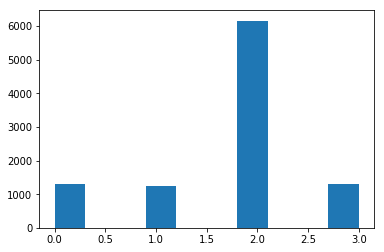

In [13]:
state = (0,0)
print(f'Preferred action for {state} is {a.policy[state]}')
print('At epsilon 0.5, we get:')
actions = np.array([a.select_action(state,epsilon=0.5) for i in range(10000)])
plt.hist(actions)[2]

In [14]:
#epsilon decaying 
a = MCAgent(env,policy_a,start_epsilon=0.9,end_epsilon=0.1,epsilon_decay=0.9)

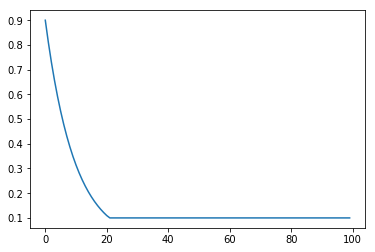

In [15]:
eps = np.array([a.get_epsilon(i) for i in range(100)])
plt.plot(eps)

### State Value

$v_\pi(s) = \sum_{a \in \mathcal{A}(s)}\pi(a|s)\sum_{s' \in \mathcal{S}, r\in\mathcal{R}}p(s',r|s,a)(r + \gamma v_\pi(s'))$

In [29]:
#deterministic env
env = Gridworld(wind_p=0.)
policy = {(0, 0): 3,
          (0, 1): 3,
          (0, 2): 0,
          (1, 0): 3,
          (1, 1): 3,
          (1, 2): 0,
          (2, 0): 3,
          (2, 1): 0,
          (2, 2): 0}
a = MCAgent(env,policy = policy, gamma = 1)
print('Reward Grid')
env.print_reward()
print('\n')
print('Policy: Reach Goal ASAP')
a.print_policy()

Reward Grid

----------
0 |-5 |5 |
----------
0 |0 |0 |
----------
0 |0 |0 |

Policy: Reach Goal ASAP

----------
R |R |U |
----------
R |R |U |
----------
R |U |U |

**Coding Assignment** Implement `get_v` function of `agent.py`

In [30]:
for state in env.state_space:
    a.v[state] = a.get_v(start_state=state, epsilon=0.)
a.print_v()


---------------
-2 |4 |-1 |
---------------
2 |3 |4 |
---------------
1 |2 |3 |

In [18]:
a.gamma = 0.5
for state in env.state_space:
    a.v[state] = a.get_v(start_state=state, epsilon=0.)
a.print_v()


---------------
-4.0 |4.0 |-1.0 |
---------------
-0.5 |1.0 |4.0 |
---------------
-1.2 |-0.5 |1.0 |

**Concept assigment** What are the best discount factor $\gamma$ for each of the following environments?
* [CartPole OpenAI](https://github.com/openai/gym/wiki/CartPole-v0) - An agent is a cart trying to balance a pole by going left or right. It gets +1 for each step the pole stays on and +0 when the pole falls over.
* [CartPole Alternative](http://incompleteideas.net/book/the-book-2nd.html) - An agent is a cart trying to balance a pole by going left or right. It gets -1 if the pole falls over and +0 otherwise.
* [Banana Collector](https://www.youtube.com/watch?v=heVMs3t9qSk) - An agent is a robot who collects bananas in a room. It gets +1 for yellow bananas and -1 for blue bananas. The time limit is 300 steps.

### (State-)Action Value

$q_\pi(s,a) = \sum_{s' \in \mathcal{S}, r\in\mathcal{R}}p(s',r|s,a)(r + \gamma\sum_{a' \in \mathcal{A}(s')} \pi(a'|s') q_\pi(s',a'))$

**Coding Assignment** Implement `get_q` function of `agent.py`. What's the difference between `get_q` and `get_v`?

In [19]:
print('Reward Grid')
env.print_reward()
print('\n')
print('Policy: Reach Goal ASAP')
a.print_policy()

a.gamma=1
for state in env.state_space:
    for action in env.action_space:
        a.q[state][action] = a.get_q(state,action,epsilon=0.)

print(f'\nActions: {env.action_text}')
for i in a.q: print(i,a.q[i])

Reward Grid

----------
0 |-5 |5 |
----------
0 |0 |0 |
----------
0 |0 |0 |

Policy: Reach Goal ASAP

----------
R |R |U |
----------
R |R |U |
----------
R |U |U |
Actions: ['U' 'L' 'D' 'R']
(0, 0) [-3. -3.  1. -2.]
(0, 1) [ 3. -3.  2.  4.]
(0, 2) [-1. -2.  3. -1.]
(1, 0) [-3.  1.  0.  2.]
(1, 1) [-2.  1.  1.  3.]
(1, 2) [4. 2. 2. 3.]
(2, 0) [1. 0. 0. 1.]
(2, 1) [2. 0. 1. 2.]
(2, 2) [3. 1. 2. 2.]


### Comparing Policies

When comparing two policies a and b:

$\pi_a > \pi_b$ if and only if $v_{\pi_a}(s) > v_{\pi_b}(s)$ for all $s \in \mathcal{S}$

An optimal policy $\pi^*$ is defined as:

$\pi^* > \pi$ for all $\pi$

We can also find an optimal policy from action value function as choosing the action with the highest q-value out of any action in that state:

$\pi^*(s) = argmax_{a \in \mathcal{A}}q^*(s,a)$

In [20]:
#deterministic env
env = Gridworld(wind_p=0.)
#deterministic policy
policy_a = {(0, 0): 3,
          (0, 1): 3,
          (0, 2): 0,
          (1, 0): 3,
          (1, 1): 3,
          (1, 2): 0,
          (2, 0): 3,
          (2, 1): 0,
          (2, 2): 0}
policy_b = {(0, 0): 2,
          (0, 1): 3,
          (0, 2): 0,
          (1, 0): 2,
          (1, 1): 2,
          (1, 2): 0,
          (2, 0): 3,
          (2, 1): 3,
          (2, 2): 0}

a = MCAgent(env,policy_a)
print('Policy A: Reach Goal ASAP')
a.print_policy()
for state in env.state_space:
    a.v[state] = a.get_v(start_state=state, epsilon=0.)
a.print_v()
print('\n')
print('Policy B: Avoid Trap')
a.policy = policy_b
a.print_policy()
for state in env.state_space:
    a.v[state] = a.get_v(start_state=state, epsilon=0.)
a.print_v()

Policy A: Reach Goal ASAP

----------
R |R |U |
----------
R |R |U |
----------
R |U |U |
---------------
-2.4 |4.0 |-1.0 |
---------------
1.3 |2.6 |4.0 |
---------------
0.2 |1.3 |2.6 |

Policy B: Avoid Trap

----------
D |R |U |
----------
D |D |U |
----------
R |R |U |
---------------
-1.7 |4.0 |-1.0 |
---------------
-0.8 |0.2 |4.0 |
---------------
0.2 |1.3 |2.6 |

## Solving Reinforcement Learning Problems - Monte Carlo Methods

There are two main approaches in solving reinforcement learning: **model-based** and **model-free** approaches. A model-based approach assumes that we have some or full knowledge of how our environment works whereas a model-free approach relies on our agent to explore the environment without any prior knowledge. 

In this workshop, we will focus on model-free approaches which usually involves two steps: evalulating the state or action value function based on the agent's interactions with the environment also known as **prediction problem** and changing the agent's policy to be closer to an optimal policy also known as **control problem**.

We start with the Monte Carlo Methods aka the trial-and-error-until-you-get-rich-or-broke methods.

![Monte Carlo](img/monte_carlo.jpg)

### Prediction Problem

In [21]:
#stochastic environment
env = Gridworld(wind_p=0.2)

#initial policy
policy = {(0, 0): 3,
          (0, 1): 3,
          (0, 2): 0,
          (1, 0): 3,
          (1, 1): 3,
          (1, 2): 0,
          (2, 0): 3,
          (2, 1): 0,
          (2, 2): 0}

#stochastic agent - epsilon greedy with decays
a = MCAgent(env, policy = policy, gamma = 0.9, 
            start_epsilon=0.9,end_epsilon=0.3,epsilon_decay=0.9)

print('Reward Grid')
env.print_reward()
print('\n')
print('Policy: Reach Goal ASAP')
a.print_policy()

Reward Grid

----------
0 |-5 |5 |
----------
0 |0 |0 |
----------
0 |0 |0 |

Policy: Reach Goal ASAP

----------
R |R |U |
----------
R |R |U |
----------
R |U |U |

#### Monte Carlo State Value Prediction

![Monte Carlo State Value Prediction](img/mc_predict_v.png)

In [22]:
a.mc_predict_v()
a.print_v()


---------------
-3.2 |2.5 |0 |
---------------
-1.1 |0.6 |2.8 |
---------------
-1.8 |-0.9 |0.8 |

#### Monte Carlo Action Value Prediction

![Monte Carlo Action Value Prediction](img/mc_predict_q.png)

In [23]:
a.mc_predict_q(first_visit=False)
print(f'\nActions: {env.action_text}')
for i in a.q: print(i,a.q[i])


Actions: ['U' 'L' 'D' 'R']
(0, 0) [-3.9453579  -4.15379883 -2.22871414 -3.27019098]
(1, 0) [-3.76717188 -1.96185864 -2.41377348 -0.7582566 ]
(2, 0) [-2.61606688 -3.1332547  -2.32319336 -1.52578252]
(2, 1) [-0.69448481 -2.71918591 -2.34399761 -0.63118933]
(2, 2) [ 1.29096544 -2.0527626  -0.59400853  0.17568285]
(1, 2) [ 3.49633495 -0.83165808 -0.07926969  1.4554708 ]
(1, 1) [-3.2971451  -1.98674747 -1.61504276  1.3794007 ]
(0, 1) [ 1.24640547 -3.88688938 -0.69849022  3.4791249 ]
(0, 2) [0. 0. 0. 0.]


### Control Problem

In [24]:
#stochastic environment
env = Gridworld(wind_p=0.2)

#initial policy
policy = {(0, 0): 3,
          (0, 1): 3,
          (0, 2): 0,
          (1, 0): 3,
          (1, 1): 3,
          (1, 2): 0,
          (2, 0): 3,
          (2, 1): 0,
          (2, 2): 0}

#stochastic agent - epsilon greedy with decays
a = MCAgent(env, policy = policy, gamma = 0.9, 
            start_epsilon=0.9,end_epsilon=0.3,epsilon_decay=0.9)

print('Reward Grid')
env.print_reward()
print('\n')
print('Policy: Reach Goal ASAP')
a.print_policy()

Reward Grid

----------
0 |-5 |5 |
----------
0 |0 |0 |
----------
0 |0 |0 |

Policy: Reach Goal ASAP

----------
R |R |U |
----------
R |R |U |
----------
R |U |U |

### All-visit Monte Carlo

**Coding Assignment** Implement `mc_control_q` function of `agent.py` using either all-visit or first-visit Monte Carlo.

In [25]:
#reset
a.policy = policy
a.q = defaultdict(lambda: np.zeros(a.n_action))
a.n_q = defaultdict(lambda: np.zeros(a.n_action))

a.mc_control_q(n_episode = 1000,first_visit=False)
a.print_policy()
print(f'\nActions: {env.action_text}')
for i in a.q: print(i,a.q[i])


----------
D |R |U |
----------
R |R |U |
----------
D |R |U |
Actions: ['U' 'L' 'D' 'R']
(0, 0) [-3.71145637 -3.73476388 -1.93291734 -3.08592739]
(0, 1) [ 0.81986429 -3.42699734 -0.77561971  3.49921695]
(1, 1) [-1.45736971 -3.47766418 -1.66144641  1.42421693]
(1, 2) [ 3.56672025 -1.12376792 -1.11773791  1.097635  ]
(1, 0) [-4.5176349  -2.87546744 -2.50694923 -0.79525219]
(2, 0) [-3.632104   -2.9318347  -0.8146     -1.15123686]
(2, 1) [-0.48045889 -4.2053248  -0.581158    0.6218    ]
(2, 2) [ 0.99130823 -3.83815628  0.773      -0.53163229]
(0, 2) [0. 0. 0. 0.]


#### First-visit Monte Carlo

In [26]:
#reset
a.policy = policy
a.q = defaultdict(lambda: np.zeros(a.n_action))
a.n_q = defaultdict(lambda: np.zeros(a.n_action))

a.mc_control_q(n_episode = 1000,first_visit=True)
a.print_policy()
print(f'\nActions: {env.action_text}')
for i in a.q: print(i,a.q[i])


----------
D |R |U |
----------
R |R |U |
----------
R |R |U |
Actions: ['U' 'L' 'D' 'R']
(0, 0) [-3.67623761 -3.61003645 -2.59279023 -3.62205406]
(1, 0) [-3.2375625  -2.49771844 -5.34846987 -0.78263739]
(2, 1) [-0.52324342 -4.47573337 -1.1470465  -0.29400651]
(1, 1) [-2.92171618 -2.51850567 -1.56386673  1.32527245]
(1, 2) [ 3.38108387 -1.70764441 -0.44166736  0.86341471]
(2, 0) [-2.56750386 -5.33626478 -5.67093969 -1.94096582]
(2, 2) [ 1.28318157 -1.41581075 -0.0101933  -0.94318053]
(0, 1) [ 0.88357398 -3.09952131 -0.27923792  3.03531876]
(0, 2) [0. 0. 0. 0.]


#### Greedy within The Limit of Exploration 

![Greedy within The Limit of Exploration](img/mc_control_glie.png)

**Coding Assignment** Implement `mc_control_glie` function of `agent.py`

In [27]:
#reset
a.policy = policy
a.q = defaultdict(lambda: np.zeros(a.n_action))
a.n_q = defaultdict(lambda: np.zeros(a.n_action))

a.mc_control_glie(n_episode = 1000)
a.print_policy()
print(f'\nActions: {env.action_text}')
for i in a.q: print(i,a.q[i])


----------
D |R |U |
----------
R |R |U |
----------
R |R |U |
Actions: ['U' 'L' 'D' 'R']
(0, 0) [-2.93171411 -2.90030702 -1.92682242 -3.02698423]
(0, 1) [ 1.16250065 -4.87394682 -1.06677532  3.46019962]
(0, 2) [0. 0. 0. 0.]
(1, 0) [-3.02771505 -2.29929109 -2.5696213  -0.69499358]
(1, 1) [-3.42660959 -1.8680519  -1.34479693  1.55381323]
(1, 2) [ 3.53300077 -0.64473196 -0.47259996  1.15403313]
(2, 0) [-3.90213486 -2.56709707 -2.2689575  -1.36999764]
(2, 1) [-0.51502287 -2.49376365 -1.68546978 -0.07480667]
(2, 2) [ 1.41895696 -0.90372439 -0.12253809 -0.04078553]


#### GLIE with Constant Learning Rate

![GLIE with constant learning rate](img/mc_control_glie_constant.png)

In [28]:
#reset
a.policy = policy
a.q = defaultdict(lambda: np.zeros(a.n_action))
a.n_q = defaultdict(lambda: np.zeros(a.n_action))

a.mc_control_glie(n_episode = 1000, lr=0.1)
a.print_policy()
print(f'\nActions: {env.action_text}')
for i in a.q: print(i,a.q[i])


----------
D |R |U |
----------
R |R |U |
----------
R |R |U |
Actions: ['U' 'L' 'D' 'R']
(0, 0) [-3.0093252  -3.53621447 -1.7453115  -2.49533629]
(0, 1) [ 0.9782357  -3.49175286 -0.51669182  3.89722936]
(0, 2) [0. 0. 0. 0.]
(1, 0) [-3.39225087 -2.20413277 -2.17974173 -1.0316493 ]
(1, 1) [-3.75088582 -2.12919057 -1.65385739  1.54396361]
(1, 2) [ 3.52319569 -0.50105682  0.82994111  1.44489271]
(2, 0) [-3.44630153 -3.35845762 -2.99478041 -0.75427243]
(2, 1) [-1.13678223 -2.76713091 -2.01246241  0.86117625]
(2, 2) [ 2.33529368 -2.1589869  -0.05309148 -0.73294849]


## Challenges

* What are some other ways of solving reinforcement learning problems? How are they better or worse than Monte Carlo methods e.g. performance, data requirements, etc.?
* Play around with Gridworld. Tweak these variables and see what happens:
    * Wing probability
    * Move rewards
    * Discount factor
    * Epsilon and how to decay it (or not)
* Solve at least one of the following OpenAI gym environments with discrete states and actions:
    * FrozenLake-v0
    * Taxi-v2
    * Blackjack-v0